# Context
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.


# Objective
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

# Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

# Data Dictionary

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in dollars
- Price: The price of the used car in dollars

# Importing the Necessary Libraries.

In [103]:
# to read or access the data
import pandas as pd
import numpy as np

# to visualize the data
import seaborn as sb
import matplotlib as mp

# to create the model
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Loading and Exploring the Data

In [104]:
# Loading the data

data = pd.read_csv(r"C:\Users\User\Downloads\used_cars_data-1.csv")

In [3]:
# Exploring the first 5 rows of the data

data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


- The data looks a bit messy, so cleaning will be done in the data.

In [4]:
# checking the dimension of the data

data.shape

(7253, 14)

* There are 7253 rows and 14 columns in the data.

In [5]:
# Getting full information about the dataset, specifically the data type of each of the column.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


- The datatype for some of the columns does not tally with what is expected. For example, "Mileage" is suppose to be a numerical datatype (integer or float), not an object (string).

In [6]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

 - There are missing values in some of the columns. For example, "Power", "Price", etc.

In [98]:
# checking for duplicates

data.duplicated().sum()

0

- The data has no duplicates.

In [105]:
# make a copy of the original data

data2 = data.copy()

In [9]:
# Unique values in the categorical variables.

cat_var = data2.select_dtypes(include= "object").columns.to_list()

cat_var

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power']

In [10]:
# value count for the categorical variables.

for i in cat_var:
    print(data2[i].value_counts())
    print("*" * 65)

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
*****************************************************************
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
*****************************************************************
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
**************

In [11]:
# Unique values in the non-categorical variables.

non_cat_var = data2.select_dtypes(exclude= "object").columns.to_list()

non_cat_var

['S.No.', 'Year', 'Kilometers_Driven', 'Seats', 'New_Price', 'Price']

In [12]:
# value count for the non-categorical variables.

for val in non_cat_var:
    print(data2[val].value_counts())
    print("*" * 60)

0       1
4818    1
4844    1
4843    1
4842    1
       ..
2413    1
2412    1
2411    1
2410    1
7252    1
Name: S.No., Length: 7253, dtype: int64
************************************************************
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: Year, dtype: int64
************************************************************
60000    96
65000    86
45000    86
70000    77
50000    72
         ..
87200     1
48324     1
20773     1
66355     1
72443     1
Name: Kilometers_Driven, Length: 3660, dtype: int64
************************************************************
5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64
***************************************

In [13]:
"""Getting the random sampling of selected variables (columns) that have their data types as a combination of numerics and 
objects.""" 

data2[["Mileage", "Engine", "Power"]].sample(5)

,Mileage,Engine,Power
6220,17.8 kmpl,1497 CC,117.3 bhp
4837,21.1 kmpl,814 CC,55.2 bhp
3913,21.1 kmpl,1248 CC,73.9 bhp
2972,18.6 kmpl,1197 CC,81.83 bhp
4876,18.6 kmpl,1197 CC,81.83 bhp


In [14]:
# Exploring the column "Mileage" further, to get the unique mileage.

data2["Mileage"].head(10)

0    26.6 km/kg
1    19.67 kmpl
2     18.2 kmpl
3    20.77 kmpl
4     15.2 kmpl
5    21.1 km/kg
6    23.08 kmpl
7    11.36 kmpl
8    20.54 kmpl
9     22.3 kmpl
Name: Mileage, dtype: object

- It has both km/kg and kmpl. Km/kg seem not to be an appropriate unit for mileage

In [15]:
# checking the correlation and possibly multicolinearity.

data2.corr()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
S.No.,1.000000,0.005573,-0.007697,-0.006720,-0.020737,-0.020275
Year,0.005573,1.000000,-0.187859,0.008216,-0.006277,0.305327
Kilometers_Driven,-0.007697,-0.187859,1.000000,0.090221,0.015501,-0.011493
Seats,-0.006720,0.008216,0.090221,1.000000,0.037519,0.052225
New_Price,-0.020737,-0.006277,0.015501,0.037519,1.000000,0.763362
Price,-0.020275,0.305327,-0.011493,0.052225,0.763362,1.000000


In [16]:
numeric = data2.select_dtypes(include= "number")

num_corr = numeric.corr()

<AxesSubplot:>

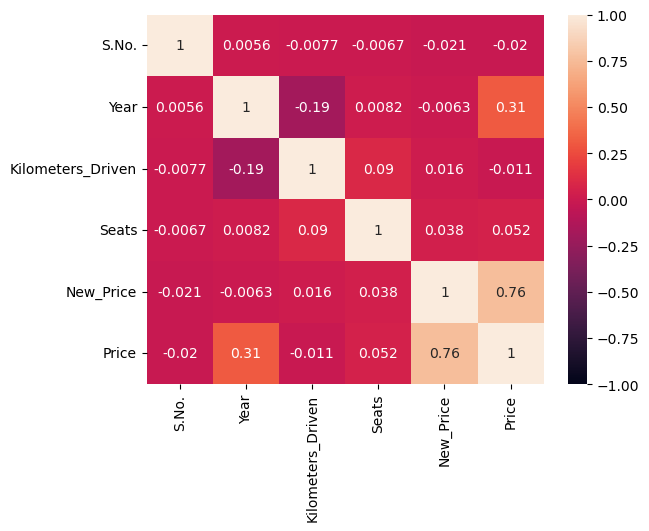

In [17]:
# Getting the variable correlations in a map form.

sb.heatmap(num_corr, vmax= 1, vmin= -1, annot= True)

 - There is no multi-colineraity, meaning the variables or features do not have high correlation with themselves.

 - There are both postive and negative correlations among the variables. For example, "New_Price" and "Year", "Kilometers_Driven" and "Year", "Kilometers_Driven" and "Price" all have negative correlations, meaning as one of the variable increases, the other corresponding variable decreases.

 - Aside "New_Price" and "Year", the other features do not have high correlation with the target ("Price"). This means the model might not perform very well.

In [18]:
# checking the data for statistical overview.

data2.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.00,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.0
New_Price,7253.0,21.307322,24.256314,3.91,7.88,11.30,21.69,375.0
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.0


- This is just for numeric variables.

In [19]:
# to show the statistical summary of all the columns (numerics and objects).

data2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- From the mean and median (50%) values for the target "Price", it shows the data is right-skewed since the mean is far greater than the median.

## Univariate Analysis

In [101]:
# importing the package to use for the visualization

from utils import histogram_boxplot, labeled_barplot

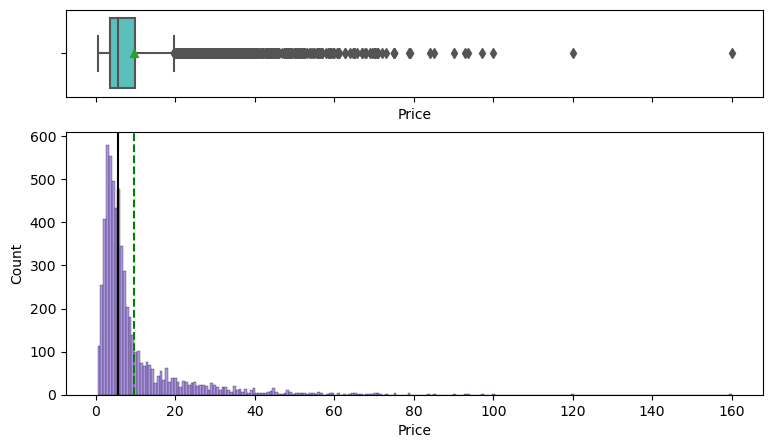

In [106]:
# plotting for the "Price" variable

histogram_boxplot(data= data2, feature= "Price")

- This is the target variable.

- It is right-skewed and as such needs to be transformed using log.

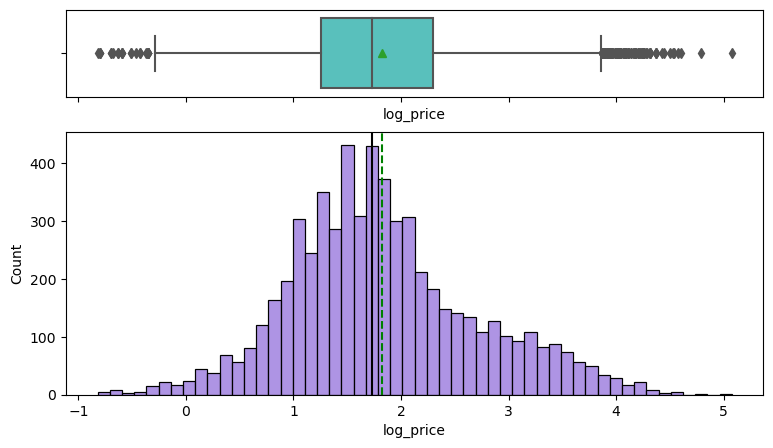

In [120]:
data2["log_price"] = np.log(data2["Price"])

# using "histogram_boxplot(data2, "log_price")" or the below command

histogram_boxplot(data= data2, feature= "log_price")

* The transformed price which is actually the "log_price" and also the target is now normally distributed.

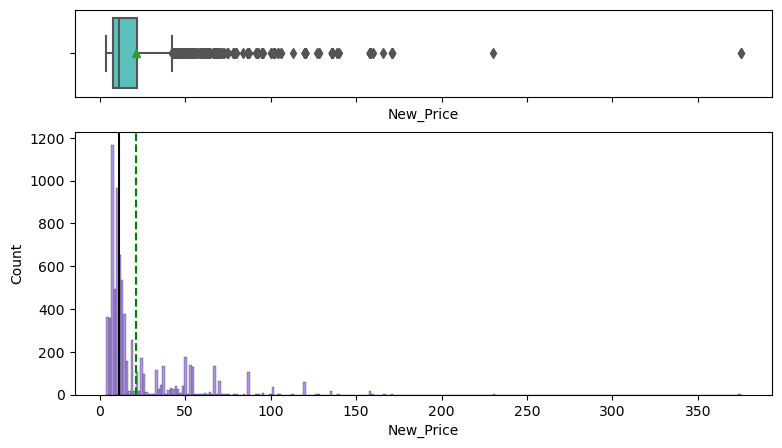

In [107]:
# plotting for the "New_Price" variable

histogram_boxplot(data= data2, feature= "New_Price")

- It is right-skewed, which means there are outliers in the values of the variable.

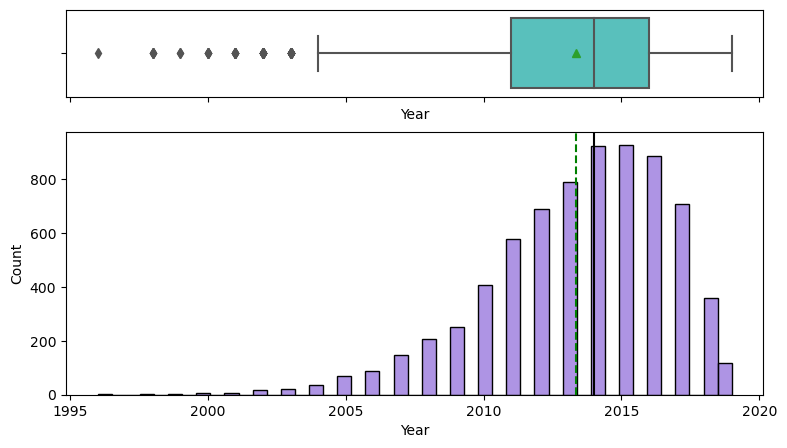

In [108]:
# plotting for the "Year" variable.

histogram_boxplot(data= data2, feature= "Year")

- It is left-skewed and there is presence of outliers in the values of the variable.

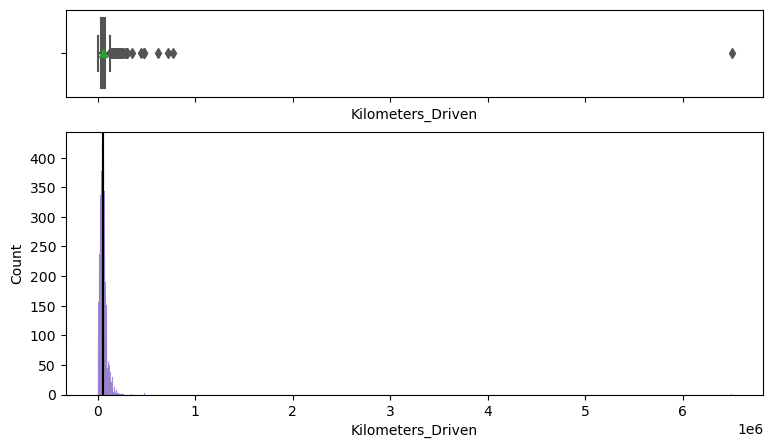

In [109]:
# plotting for the "Kilometers_Driven" variable

histogram_boxplot(data= data2, feature= "Kilometers_Driven")

- It is right-skewed, and have outliers in the variable.


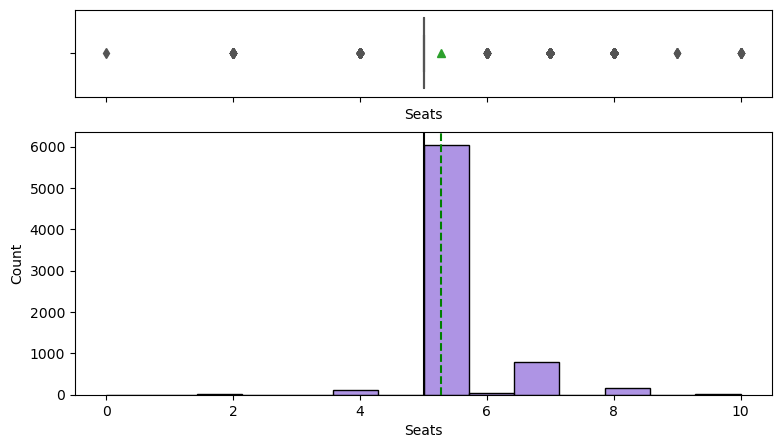

In [111]:
# plotting for the "Seats" variable.

histogram_boxplot(data= data2, feature= "Seats")

- Much cannot be explained here using this plot, so a categorical plot will be used for this variable.

# Categorical Plot

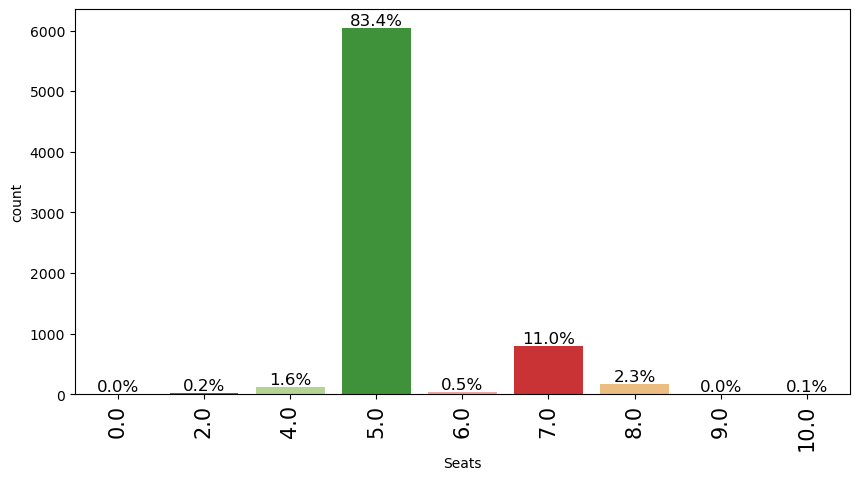

In [113]:
# plotting for the "Seats" variable.

labeled_barplot(data2, "Seats", perc=True)

- Cars with 5 seats have the highest percentage count of 83.4%, while cars with no seat (zero seat) has the least number (percentage count) with a percentage of 0.0%, alogside cars with 9 seats.

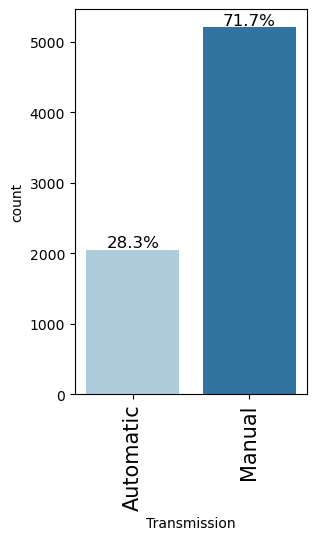

In [114]:
# plotting for the "Transmission" variable.

labeled_barplot(data2, "Transmission", perc=True)

- Cars with manual transmission have the highest percentage count of 71.7% compared to cars with automatic transmission which has a percentage count of 28.3%.

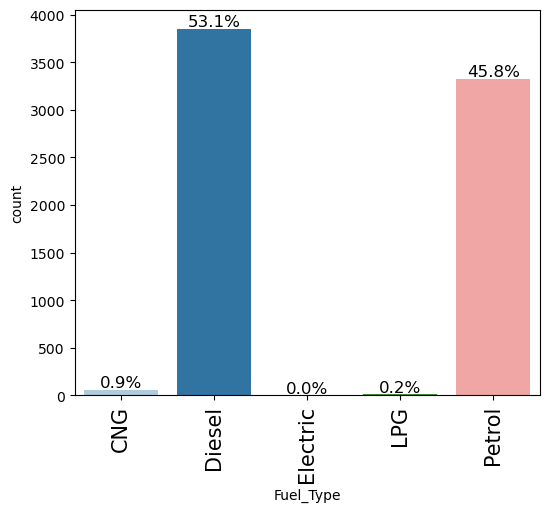

In [115]:
# plotting for the "Fuel_Type" variable.

labeled_barplot(data2, "Fuel_Type", perc=True)

- Cars with electric fuel_type have the lowest percentage count of 0.0%, while diesel cars have the highest percentage count of 53.1%, followed by petrol cars with 45.8%.

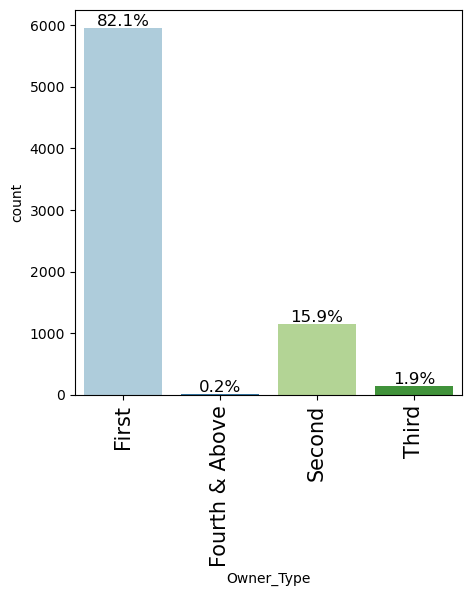

In [116]:
# plotting for the "Owner_Type" variable.

labeled_barplot(data2, "Owner_Type", perc=True)

- First owner cars or new cars have the highest percentage count of 82.1%, followed by second-new cars with a percentage count of 15.5% and the least is fourth & above (0.2%).

- This invariably means that the older the car, the lower its demand.

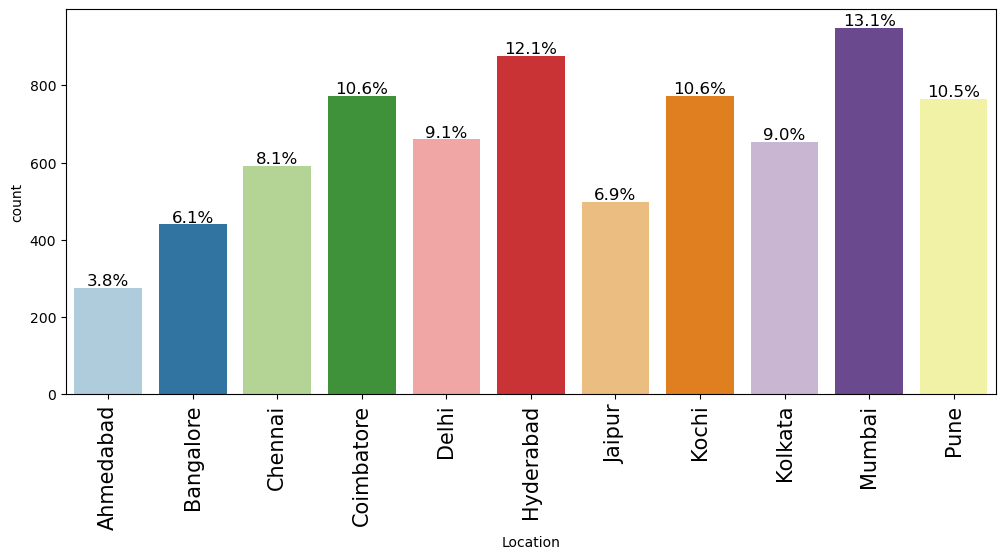

In [117]:
# plotting for the "Location" variable.

labeled_barplot(data2, "Location", perc=True)

- Although there are different percentage counts in the various locations but the differences are not widely spread, at such the location does not really have much impact in the sales of cars. So this variable will be dropped in building the model.

- Notwithstanding, Mumbai has the highest percentage count of 13.1%, while Ahmedabad has the lowest percentage count (3.8%).

# Bivariate Analysis

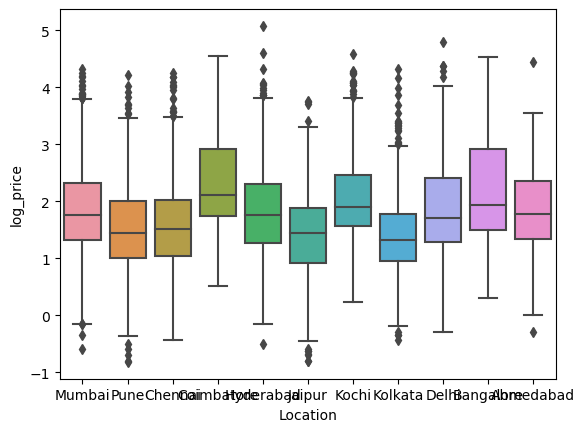

In [121]:
# Plotting the target "log_price" (dependent variable) against the feature or independent variable "Location".

sb.boxplot(y = "log_price", x= "Location", data=data2);

- Inconsistency on how the location affects the price of used cars.

- So the location does not have appropriate correlation with the target.

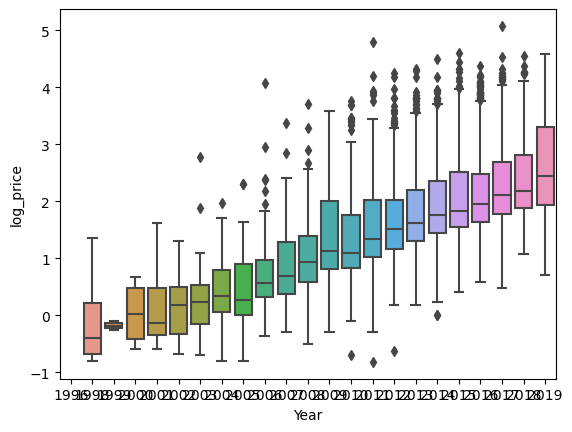

In [122]:
# Plotting the target "log_price" (dependent variable) against the feature or independent variable "Year".

sb.boxplot(y = "log_price", x= "Year", data=data2, );

- As the manufacturing year (newness of a car or how new the car is) increases, the log of the price of a used car increases.

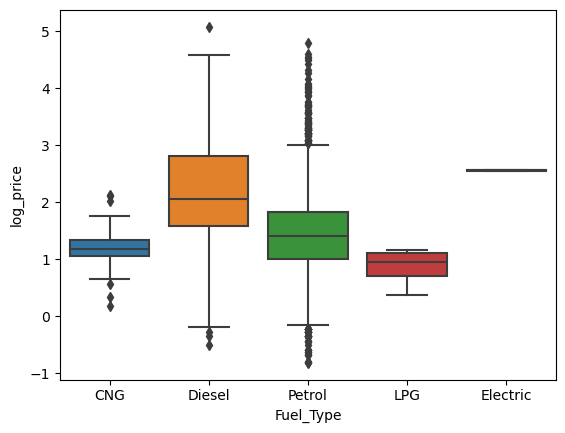

In [123]:
# Plotting the target "log_price" (dependent variable) against the feature or independent variable "Fuel_Typpe".

sb.boxplot(y = "log_price", x= "Fuel_Type", data=data2);

- The diesel fuel_type cars have better price values (log of the price) of a used car compared to other fuel_type. This is followed by petrol driven cars.

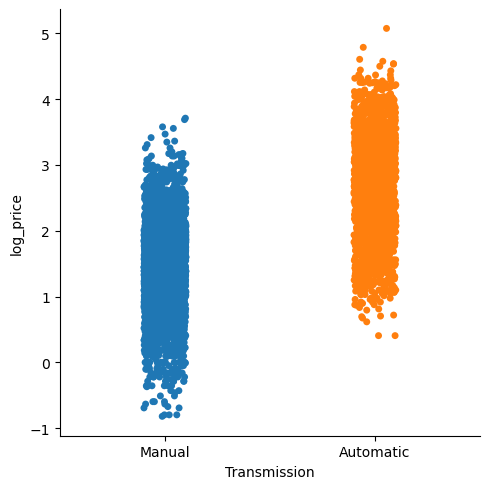

In [124]:
# Plotting the target "log_price" (dependent variable) against the feature or independent variable "Transmission" using catplot.

sb.catplot(y = "log_price", x= "Transmission", data=data2);

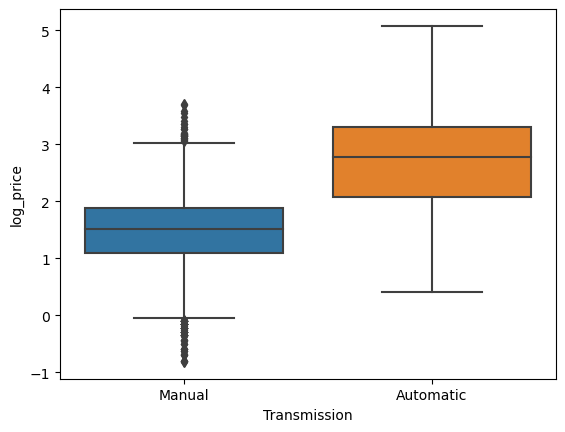

In [125]:
# Plotting the target "log_price" (dependent variable) against the feature or independent variable "Transmission" using boxplot.

sb.boxplot(y = "log_price", x= "Transmission", data=data2);

- Automatic cars have more values relative to the log_price of used cars compared to the manually driven cars.

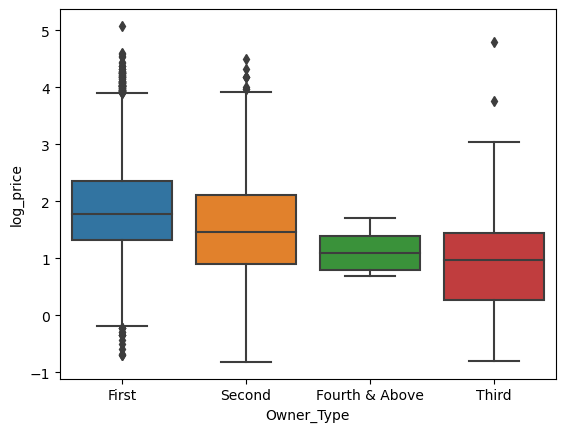

In [126]:
# Plotting the target "log_price" (dependent variable) against the feature or independent variable "Owner_Type".

sb.boxplot(y = "log_price", x= "Owner_Type", data=data2);

- As the "Owner_Type" increases (going from new to fairly-used to extremely-used cars), the log of the price of a used car decreases.
- So the value of used cars depreciates with increase in the number of previous users or owners.

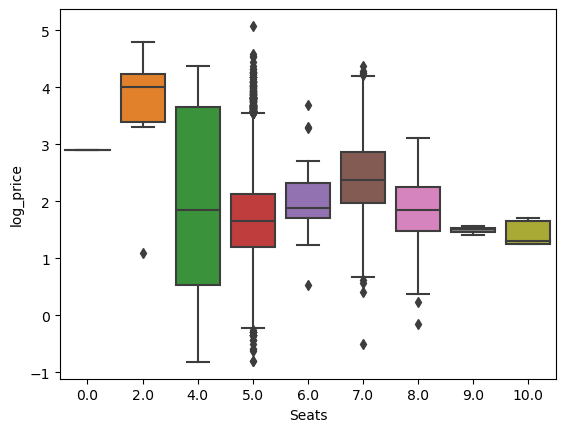

In [127]:
# Plotting the target "log_price" (dependent variable) against the feature or independent variable "Seats".

sb.boxplot(y = "log_price", x= "Seats", data=data2);

- The number of seats does not have a linear realtion with the log_price of a used car. Anyways, cars with fewer seats (for example, 2 and 4 seats) have higher values in relationship with the log of the price of the car.

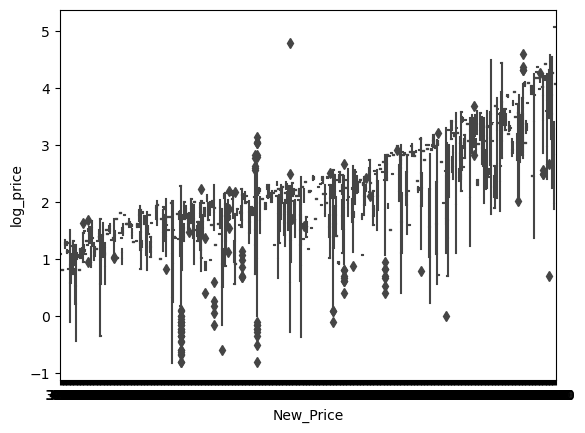

In [128]:
# Plotting the target "log_price" (dependent variable) against the feature or independent variable "New_Price".

sb.boxplot(y = "log_price", x= "New_Price", data=data2);

- As the price of new cars increase ("New_Price"), the log of the price (log_price) of used cars increase.

# Preparing the data (Data Preprocessing)

In [42]:
# Checking for duplicates

data2.duplicated().sum()

0

In [43]:
# data2.drop_duplicates(inplace= True)

In [45]:
# Getting an overview of the data

data2.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,log_price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,0.559616
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,2.525729


In [46]:
# Dropping some columns

data2.drop(["S.No.", "Price", "Name", "Location"], axis=1, inplace= True)

# data2.drop([], axis=1, inplace= True)

- Variables that might not explicitly contribute to the performance of the target and consequently the model were dropped.

- Although in some cases the type or make of the car (which in this case is the "Name" variable) influences the used value of a car positively or negatively, nevertheless, it is not generally or in its entirety.
- The "Price" which was actually supposed to be the target variable was dropped it was transformed to "log_price". This is done to avoid biasness in the model due to extremely high correlation between the "Price" and the "log_price", when in reality they are one and the same.
- The serial number "S.NO." and the "Location" have no valid or contributing signigicance to the target or model. So it is better to drop them.

In [47]:
# Checking the new dimension of the data.

data2.shape

(7253, 11)

In [48]:
# Checking the top three rows of the data to ascertain if the dropped columns have been effected.

data2.head(3)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,log_price
0,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,0.559616
1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,2.525729
2,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,1.504077


# Converting some Mixed Datatype Columns from Strings to Numerics (Int. or Float)

In [49]:
s1 = "15.56 kmpl"

# s1.split()[1].replace("kmpl", "")

s1.split()

['15.56', 'kmpl']

In [50]:
s1.split()[0].replace("kmpl", "")

'15.56'

In [51]:
# Defining the function and removing the unit in the variable "Engine"

def convert_engine (var):
    if isinstance(var, str):
        if "CC" in var:
            cc = var.split()[0].replace("CC", "")
            return cc
        else:
            return var

In [52]:
# applying it into the function.

data2["Engine"] = data2["Engine"].apply(convert_engine)

In [53]:
# Defining the function and removing the unit in the variable "Mileage"

def convert_from_kmpl(var):
    if isinstance(var, str):
        if "kmpl" in var:
            kmpl = var.split()[0].replace("kmpl", "")
            return kmpl
        elif "km/kg" in var:
            kg = float(var.split()[0].replace("kmpl", "")) * 1.40
            return kg
        else:
            return var

In [54]:
# applying it into the function.

data2["Mileage"] = data2["Mileage"].apply(convert_from_kmpl)

In [55]:
# Defining the function and removing the unit in the variable "Power"

def convert_power (var):
    if isinstance(var, str):
        if "bhp" in var:
            bhp = var.split()[0].replace("CC", "")
            return bhp
        else:
            return var

In [56]:
# applying it into the function.

data2["Power"] = data2["Power"].apply(convert_power)

In [57]:
# Checking datatype for "Mileage"

data2["Mileage"].head()

0    37.24
1    19.67
2     18.2
3    20.77
4     15.2
Name: Mileage, dtype: object

In [58]:
# Checking datatype for "Power"

data2["Power"].head()

0    58.16
1    126.2
2     88.7
3    88.76
4    140.8
Name: Power, dtype: object

In [59]:
# Checking datatype for "Engine"

data2["Engine"].head()

0     998
1    1582
2    1199
3    1248
4    1968
Name: Engine, dtype: object

# Converting Datatype from Object to Float

In [60]:
# converting datatype from object to float for "Mileage"

data2["Mileage"] = data2["Mileage"].astype(float)

In [61]:
# converting datatype from object to float for "Mileage"

data2["Power"] = data2["Power"].astype(float)

In [62]:
# converting datatype from object to float for "Mileage"

data2["Engine"] = data2["Engine"].astype(float)

In [63]:
# rechecking datatype for "Mileage"

data2["Mileage"].head()

0    37.24
1    19.67
2    18.20
3    20.77
4    15.20
Name: Mileage, dtype: float64

In [64]:
# rechecking datatype for "Engine"

data2["Engine"].head()

0     998.0
1    1582.0
2    1199.0
3    1248.0
4    1968.0
Name: Engine, dtype: float64

In [65]:
# rechecking datatype for "Power"

data2["Power"].head()

0     58.16
1    126.20
2     88.70
3     88.76
4    140.80
Name: Power, dtype: float64

# Addressing Missing Values

In [67]:
# Checking for missing values

data2.isna().sum()

Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
log_price            1234
dtype: int64

In [68]:
# Getting a list of the object data type variables

cat_cols = data2.select_dtypes(include= "object").columns.to_list()

cat_cols

['Fuel_Type', 'Transmission', 'Owner_Type']

In [69]:
# Getting a list of the numerical data type variables

num_cols = data2.select_dtypes(include= "number").columns.to_list()

num_cols

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'log_price']

In [70]:
# fixing the missing values in the numerical variables

data2[num_cols] = data2.groupby(["Owner_Type"])[num_cols].transform(lambda x: x.fillna(x.median()))

In [71]:
data2.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,log_price
0,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,5.51,0.559616
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,2.525729
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,1.504077
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,1.791759
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,2.875822


In [72]:
"""Rechecking for missing values"""

data2.isnull().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
log_price            0
dtype: int64

- Missing values in the data have been fixed. No more missing values

# Normalizing and Building the Model

In [73]:
# Getting a statistical view of all the datatype in the data.

data2.describe(include= "all", ).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7253.0,NaN,NaN,NaN,18.241085,4.839255,0.0,15.26,18.2,21.1,46.956
Engine,7253.0,NaN,NaN,NaN,1615.658762,593.509845,72.0,1198.0,1493.0,1968.0,5998.0
Power,7253.0,NaN,NaN,NaN,112.329434,52.922358,34.2,77.0,93.7,138.03,616.0
Seats,7253.0,NaN,NaN,NaN,5.277678,0.809039,0.0,5.0,5.0,5.0,10.0
New_Price,7253.0,NaN,NaN,NaN,21.307322,24.256314,3.91,7.88,11.3,21.69,375.0


In [74]:
# Getting a statistical view of just the numerical datatype in the data.

data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.000000,2011.000000,2014.000000,2016.000000,2.019000e+03
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.000000,34000.000000,53416.000000,73000.000000,6.500000e+06
Mileage,7253.0,18.241085,4.839255,0.000000,15.260000,18.200000,21.100000,4.695600e+01
Engine,7253.0,1615.658762,593.509845,72.000000,1198.000000,1493.000000,1968.000000,5.998000e+03
Power,7253.0,112.329434,52.922358,34.200000,77.000000,93.700000,138.030000,6.160000e+02
Seats,7253.0,5.277678,0.809039,0.000000,5.000000,5.000000,5.000000,1.000000e+01
New_Price,7253.0,21.307322,24.256314,3.910000,7.880000,11.300000,21.690000,3.750000e+02
log_price,7253.0,1.805672,0.800053,-0.820981,1.335001,1.776646,2.128232,5.075174e+00


- Some of the variables, precisely "Mileage" and "Seats" have unreasonable values (zero) as their min. This ofcourse could be due to error or mistakes when the values were being entered or some other forms of errors.

In [75]:
# defening functions to tackle or treat outliers.

def treat_outliers(df, col):
    """
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(
        df[col], Lower_Whisker, Upper_Whisker
    )  # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
    # and all the values above upper_whisker will be assigned value of upper_Whisker
    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [76]:
# effecting the treatment of the outliers.

data2 = treat_outliers_all(data2, num_cols)

In [77]:
# Checking the first two rows of the data to get an overview.

data2.head(2)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,log_price
0,2010.0,72000.0,CNG,Manual,First,29.86,998.0,58.16,5.0,5.51,0.559616
1,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,2.525729


In [81]:
# Getting the x and y-axis to build the model.

x = data2.drop("log_price", axis=1)

y = data2["log_price"]

In [84]:
# viewing the x variables

x 

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,2010.0,72000.0,CNG,Manual,First,29.86,998.0,58.16,5.0,5.510
1,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.060
2,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.610
3,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,5.0,11.270
4,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,42.405
...,...,...,...,...,...,...,...,...,...,...
7248,2011.0,89411.0,Diesel,Manual,First,20.54,1598.0,103.60,5.0,13.230
7249,2015.0,59000.0,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,10.150
7250,2012.0,28000.0,Diesel,Manual,First,23.08,1461.0,63.10,5.0,9.470
7251,2013.0,52262.0,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,10.150


In [85]:
# Creating dummies for the x-axis variabes.

x = pd.get_dummies(x, drop_first= True)

x

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010.0,72000.0,29.86,998.0,58.16,5.0,5.510,0,0,0,0,1,0,0,0
1,2015.0,41000.0,19.67,1582.0,126.20,5.0,16.060,1,0,0,0,1,0,0,0
2,2011.0,46000.0,18.20,1199.0,88.70,5.0,8.610,0,0,0,1,1,0,0,0
3,2012.0,87000.0,20.77,1248.0,88.76,5.0,11.270,1,0,0,0,1,0,0,0
4,2013.0,40670.0,15.20,1968.0,140.80,5.0,42.405,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,2011.0,89411.0,20.54,1598.0,103.60,5.0,13.230,1,0,0,0,1,0,0,0
7249,2015.0,59000.0,17.21,1197.0,103.60,5.0,10.150,0,0,0,1,0,0,0,0
7250,2012.0,28000.0,23.08,1461.0,63.10,5.0,9.470,1,0,0,0,1,0,0,0
7251,2013.0,52262.0,17.20,1197.0,103.60,5.0,10.150,0,0,0,1,0,0,0,1


- The data or values in each feature (variable) have been transformed.

In [86]:
# Splitting the data into training and testing

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size= 0.8, random_state= 0)

- The data have been split into trained and test datasets with a raio of 80:20 respectively.

In [87]:
# Normalizing the data.

scaled = StandardScaler()

x_train_sc = scaled.fit_transform(x_train)

x_test_sc = scaled.transform(x_test)

- The data or values in each feature (variable) have been normalized (placed within an equal or similar scale of shorter range).

In [88]:
# Training and building the linear regression model.

lin_reg = LinearRegression()

lin_reg.fit(x_train_sc, y_train)

LinearRegression()

- The model has been successfully built.

# Checking the coefficients of the parameters of the model

In [97]:
# Coefficients of the model

lin_reg.coef_

array([ 3.14265006e-01, -1.62466774e-02, -1.70996080e-02,  8.55015972e-02,
        1.61758369e-01, -4.16333634e-17,  2.55224534e-01,  7.90513152e-02,
        1.90613679e-02,  5.99962289e-03,  1.30358624e-02, -3.84945195e-02,
        5.05456255e-04, -3.51918849e-02, -3.75566819e-02])

- For one unit increase in any of the respective variables while the other variables remain unchanged, the log of the price (log_price) of a used car would either increase (for positive values) or decrease (for negative values) by the corresponding value.
- As the "Year" (manufacturing year  or indirectly how new is the car) of the car increases by 1, the log of the price ("log_price") of a used car would increase by 3.14 of the appropriate currency if other variables remain the same (unchanged).

- As the price of a new car ("New_Price") increases by 1 unit of the corresponding currency, the log of the price ("log_price") of a used car would appreciate by 2.55 of that same currency if other variables remain the same (unchanged). This means that used cars have more demand or market values than the new cars.

- As the "Kilometers_Driven" in a car increases by 1 unit, the log of the price ("log_price") of that car (used car) would decrease or depreciate by 1.62 of the corresponding currency if other variables remain the same (unchanged). This means that the more a car has been droven, the less its market or pricing value.

- As the "Mileage" (the distance the car has covered or travelled) of a car increases by 1 unit, the log of the price ("log_price") of that car (used car) decrease or depreciate by 1.71 of the relevant currency, as long as other variables remain fixed (the same). This implies that the more the distance a car has travelled, its market or pricing value reduces or decreases.

- Similar comparisons can be made for the other variables and features.

In [91]:
# Checking the columns in the x-variable or dataset

x.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

# Checking the performance of the model

In [93]:
# Defining the necessary functions

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape
        },
        index=[0],
    )

    return df_perf

In [94]:
# Checking the performance of the trained model.

train_pf = model_performance_regression(lin_reg, x_train_sc, y_train)

train_pf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.359232,0.261975,0.763944,0.763332,23.433162


- Despite the fact that the features or x-variables used in building or training the model did not have high correlation with the target, yet the model performance is relatively ok due to the low root mean squared error (RMSE), mean absolute error (MAE) and the relatively high values of both the coefficient of determinant (R-squared) and the adjusted coefficient of determinant (Adj. R-squared).
- The value of the R-squared means that the model is able to interpret or explain about 76.4% of the variation in the price of used cars.

In [96]:
# Checking the performance of the test model

test_pf = model_performance_regression(lin_reg, x_test_sc, y_test)

test_pf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.352979,0.252917,0.760013,0.757505,21.697236


- The errors the model made in the test data was a little low compared to that of the trained data.

- The value of the R-squared means that the model is able to interpret or explain about 76% of the variation in the price of used cars.

- Also, the performances of the model relative to the coefficient of determinant (R-squared) and the adjusted coefficient of determinant (Adj. R-squared) of the test data is somewhat similar (although a bit lower) to the trained data.

- This indicates that the model is not overfitting nor underfitting but it generalizes well. So in conclusion, the model is reliable.

# Insights and Recommendations

- The seats of a car has negative coefficient with the model. Which means customers prefer cars with lesser seats, maybe for pleasure, convenience and more privacy. So the company should shift her attention from cars with more seats.

- The company should concenterate more on sales of used cars than new cars, since it has better and higher price increament when evaluated on appropriate margins.

- The company should also invest more on cars with manual transmission compared to the automatic cars on a neutral scale. But relative to the the log of the price of used cars, the automatic cars have more values.

- Diesel cars have more potentials in the market compared to other "Fuel_Type" cars, maybe because is is cheaper to buy diesel or it does not combust faster or perhaps it is highly flammable compared to lets say petrol. This was followed by the petrol fuel_type cars, with electric cars having the least maybe because such cars are relatively expensive or the charging units are not commonly found in many locations or the time it takes to get the car charged. 

- So the company should focus more on diesel and petrol cars for now, and pay less attention on electric cars.

- Second-Owner_type used cars have more demand to other categories of used cars, so the company should pay more attention to how many previous owners has a certain car had, because the more the previous users or owners the lesser the value of the car.

- The location does not play any major or significant role with the sales or demand of used cars.

- The model is reliable and can be applied to external but advisably similar data structures.